In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [2]:


NbMo_concentration = np.array([5,8.5,19,25])/100

NbMo_a = np.array([3.289,3.282,3.261,3.250])
NbMo_E_k = np.array([0.6342,0.6302,0.6182,0.6112])
NbMo_E_v = np.array([2.989,2.987,2.984,2.983])
NbMo_E_si = np.array([5.361,5.437,5.664,5.784])

<Figure size 432x288 with 0 Axes>

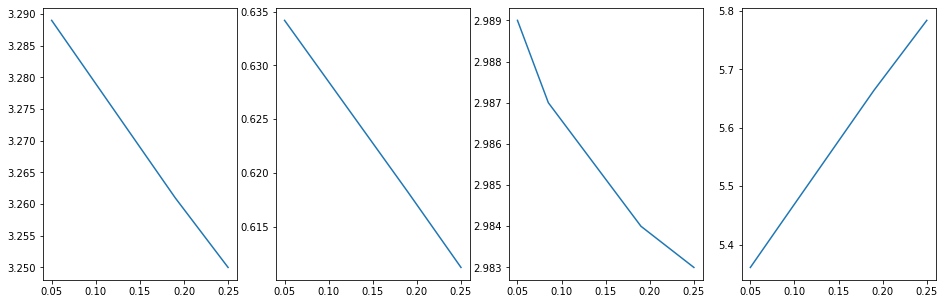

In [3]:
plt.draw()
f = plt.figure(figsize=(16,5))

(ax1,ax2,ax3,ax4) = f.subplots(1,4)

ax1.plot(NbMo_concentration, NbMo_a )
ax2.plot(NbMo_concentration, NbMo_E_k )
ax3.plot(NbMo_concentration, NbMo_E_v  )
ax4.plot(NbMo_concentration, NbMo_E_si  )


In [4]:
for quantity in [NbMo_a,NbMo_E_k,NbMo_E_v,NbMo_E_si]:
    fit = np.polyfit((NbMo_concentration),quantity,1)
    quantity_func = np.poly1d(fit)
    print(quantity_func(1))

3.1027942537131734
0.5250865351838322
2.960690041392745
7.379243486729964


In [8]:


NbW_concentration = np.array([5.6,6,15])/100


NbW_a = np.array([3.290,3.289,3.275])
NbW_E_k = np.array([0.6548,0.6559,0.6798])
NbW_E_v = np.array([3.022,3.024,3.076])
NbW_E_si = np.array([5.494,5.511,5.897])

In [9]:
for quantity in [NbW_a,NbW_E_k,NbW_E_v,NbW_E_si]:
    fit = np.polyfit((NbW_concentration),quantity,1)
    quantity_func = np.poly1d(fit)
    print(quantity_func(1))

3.1409134025483674
0.9057086597451629
3.565575743275134
9.54178787163756


In [11]:
NbW_Delta_E_p = np.array([52.4,54.1,73.2])/0.66

NbW_Delta_E_p_fit = np.polyfit((NbW_concentration),(NbW_Delta_E_p)**2,1)
NbW_Delta_E_p_func = np.poly1d(NbW_Delta_E_p_fit)
np.sqrt(NbW_Delta_E_p_func(1))

256.6021785519676

In [12]:
NbMo_Delta_E_p = np.array([48.8,56.2,74.5,84.7])/0.79
NbMo_Delta_E_p_fit = np.polyfit((NbMo_concentration),(NbMo_Delta_E_p)**2,1)
NbMo_Delta_E_p_func = np.poly1d(NbMo_Delta_E_p_fit)
np.sqrt(NbMo_Delta_E_p_func(0))

42.91159055976352

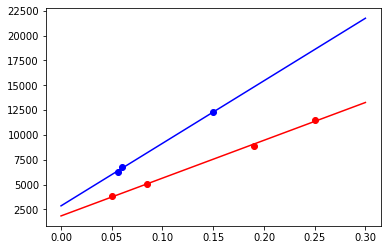

In [13]:
plt.scatter(NbMo_concentration,NbMo_Delta_E_p**2,color='r')
plt.scatter(NbW_concentration,NbW_Delta_E_p**2,color='b')
x = np.linspace(0,0.3,100)
plt.plot(x,NbMo_Delta_E_p_func(x),'r')
plt.plot(x,NbW_Delta_E_p_func(x),'b')

In [14]:
#Delta_E_p_i = np.array([34.3,157.9,169.3])
# Nb, Mo, W
Delta_E_p_i = np.array([53.4,199.8,256.6]) # unscaled 
c1 = np.array([95,5,0])/100
c2 = np.array([91.5,8.5,0])/100
c3 = np.array([94,0,6])/100
c4 = np.array([81,19,0])/100
c5 = np.array([85,0,15])/100

In [15]:
np.dot(Delta_E_p_i **2,c4 )**(0.5)*0.79

78.58245278635684

In [16]:
a = np.array([1,2,3,4,5])
b = np.array([2,2,31,40,5])
c = np.array([13,21,3,4,7])
d = np.array([a,b,c])

In [17]:
tau_i_pst = d.transpose()
tau_i_pst

array([[ 1,  2, 13],
       [ 2,  2, 21],
       [ 3, 31,  3],
       [ 4, 40,  4],
       [ 5,  5,  7]])

In [18]:
[np.sum(i**2)**(0.5) for i in tau_i_pst]

[13.19090595827292,
 21.18962010041709,
 31.28897569432403,
 40.39801975344831,
 9.9498743710662]

In [19]:
def H_p(E_k,
        Delta_V_p_,
        Delta_E_p,
        a,
        tau_p,
        x):
    eV2J = 1.6021760769831632e-19
    E_k = E_k*eV2J
    Delta_V_p_ = Delta_V_p_*eV2J
    Delta_E_p = Delta_E_p*eV2J
    
    a = a*1e-10
    a_p = np.sqrt(2/3)*a
    b = np.sqrt(3)/2*a
    xi = (1.083*E_k/Delta_E_p)**2 * b
    
    Delta_E_b_p = 0.7*E_k
    Delta_V_p = Delta_V_p_/b
    H_p_x = Delta_E_b_p /2 * (1-np.cos(np.pi*x/a_p)) + 2.5 /2 * xi * Delta_V_p*(1-np.cos(2*np.pi*x/a_p)) - 5/2*tau_p*b*xi*x
    
    return H_p_x

In [71]:
a = 3.393
Delta_V_p_ = 10.7/1000 
E_k = 0.255
Delta_E_p = 71/1000
a_p = np.sqrt(2/3)*a

In [72]:
tau_p = 0
x_list = np.linspace(0,2*a_p*1e-10,1000)

In [73]:


tau_of_x_list = H_p(E_k,
        Delta_V_p_,
        Delta_E_p,
        a,
        tau_p,
        x_list)


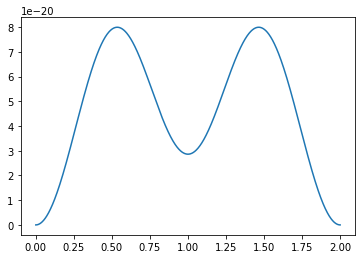

In [74]:
plt.plot(x_list/a_p*1e10,tau_of_x_list)


In [75]:
a = a*1e-10
a_p = np.sqrt(2/3)*a
b = np.sqrt(3)/2*a
xi = (1.083*E_k/Delta_E_p)**2 * b

tau_of_x_list.max() /2.5/b/xi/0.25/a_p

353376735.06549376

In [77]:
tau_of_x_list.max() /2.5/b/xi/0.25/a_p/1e6

353.3767350654938